## Importing all the required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Libraries for importing analysing and Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Working on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import roc_auc_score,r2_score

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None


## Importing the dataset

In [4]:
df = pd.read_csv('telecom_churn_data.csv')
print(df.shape)
df.head()

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df_cols = list(df.columns)

In [7]:
# Checking all the variables with their missing values along with their dtypes
for i in df_cols:
  drp = (df[f'{i}'].isnull().sum()/99999)*100
  # if drp<10
  print(i,drp)

mobile_number 0.0
circle_id 0.0
loc_og_t2o_mou 1.018010180101801
std_og_t2o_mou 1.018010180101801
loc_ic_t2o_mou 1.018010180101801
last_date_of_month_6 0.0
last_date_of_month_7 0.6010060100601006
last_date_of_month_8 1.1000110001100012
last_date_of_month_9 1.6590165901659015
arpu_6 0.0
arpu_7 0.0
arpu_8 0.0
arpu_9 0.0
onnet_mou_6 3.9370393703937037
onnet_mou_7 3.859038590385904
onnet_mou_8 5.3780537805378055
onnet_mou_9 7.745077450774509
offnet_mou_6 3.9370393703937037
offnet_mou_7 3.859038590385904
offnet_mou_8 5.3780537805378055
offnet_mou_9 7.745077450774509
roam_ic_mou_6 3.9370393703937037
roam_ic_mou_7 3.859038590385904
roam_ic_mou_8 5.3780537805378055
roam_ic_mou_9 7.745077450774509
roam_og_mou_6 3.9370393703937037
roam_og_mou_7 3.859038590385904
roam_og_mou_8 5.3780537805378055
roam_og_mou_9 7.745077450774509
loc_og_t2t_mou_6 3.9370393703937037
loc_og_t2t_mou_7 3.859038590385904
loc_og_t2t_mou_8 5.3780537805378055
loc_og_t2t_mou_9 7.745077450774509
loc_og_t2m_mou_6 3.93703937039

In [8]:
df_cols.remove("mobile_number")

In [9]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Hadling Missing values

In [10]:
def_cols = list(df.describe().columns)

In [11]:
# Imputing the categorical missing values with the mode 
for i in def_cols:
  if len(df[f'{i}'].value_counts())<10:
    df[f'{i}'].fillna(df[f'{i}'].mode()[0], inplace = True)

In [12]:
# Veryfying wether they are missing values are imputed or not
for i in def_cols:
  print(df[f'{i}'].isnull().sum())

0
0
0
0
0
0
0
0
0
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
0
0
0
0
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
0
0
0
0
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
0
0
0
0
3937
3859
5378
7745
0
0
0
0
3937
3859
5378
7745
3937
3859
5378
7745
3937
3859
5378
7745
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
74846
74428
73660
74077
74846
74428
73660
74077
74846
74428
73660
74077
74846
74428
73660
74077
74846
74428
73660
74077
0
0
0
0
0
0
0
0
74846
74428
73660
74077
74846
74428
73660
74077
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
# imputing the continuos variables with the mean value
for i in def_cols:
  if len(df[f'{i}'].value_counts())>10:
    df[f'{i}'].fillna(df[f'{i}'].mean(), inplace = True)

In [14]:
# No more null values in the data except for the object variables
df.isnull().sum()*100/99999

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.000000
std_og_t2o_mou               0.000000
loc_ic_t2o_mou               0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
onnet_mou_9                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
offnet_mou_9                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_ic_mou_9                0.000000
roam_og_mou_6                0.000000
roam_og_mou_

In [15]:
#dropping variables with more than 70% missing values
df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1, inplace=True)

In [16]:
df.isnull().sum()*100/99999

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             0.000000
onnet_mou_7             0.000000
onnet_mou_8             0.000000
onnet_mou_9             0.000000
offnet_mou_6            0.000000
offnet_mou_7            0.000000
offnet_mou_8            0.000000
offnet_mou_9            0.000000
roam_ic_mou_6           0.000000
roam_ic_mou_7           0.000000
roam_ic_mou_8           0.000000
roam_ic_mou_9           0.000000
roam_og_mou_6           0.000000
roam_og_mou_7           0.000000
roam_og_mou_8           0.000000
roam_og_mou_9           0.000000
loc_og_t2t_mou_6        0.000000
loc_og_t2t

In [17]:
drp_cols = ['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8' , 'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'  ]    
df.drop(drp_cols,axis=1, inplace=True)

In [18]:
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [19]:
df['total_data_amt6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']

In [20]:
df['total_amt6'] = df['total_rech_amt_6'] + df['total_data_amt6']

In [21]:
df['total_data_amt7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [22]:
df['total_amt7'] = df['total_rech_amt_7'] + df['total_data_amt7']

In [23]:
df['total_av_amt_67'] = (df['total_amt7'] + df['total_amt6'])/2

In [24]:
qrt_amt = df.total_av_amt_67.quantile(0.7)
qrt_amt = round(qrt_amt,2)
qrt_amt

853.72

In [25]:
df = df[df['total_av_amt_67']>=qrt_amt]

In [26]:
df.shape

(29994, 219)

**We have cut down the data into only the high value customers and we got 29994 rows as mentioned in the problem stmt**

## Creating a dipendent variable

In [27]:
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [28]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
6             2572.49           65.91         0.00         0.00
7                0.00            0.00         0.00         0.00
8               34.91          142.18         0.00         0.00
13             631.86          446.09         0.00         0.00
16             334.56          255.74         0.00         0.00
17              87.13          631.08         0.00         0.00
21             252.61         1031.53         0.00         0.00
24             330.03          627.78         0.00         0.00
33             114.16            1.70        30.92      5588.11
38             114.09          708.04         0.00         0.00
41             165.84           89.13         0.00         0.00
48             894.81         2319.01         0.00         0.00
53             680.61          503.06         0.82         0.00
56             225.34          127.48       137.12       835.99
57            1047.41          326.29        22.05      4305.54
60             233.49          243.91         0.00         0.00
69             134.43          540.46         0.00         0.00
73             270.26         1609.36         0.00         0.00
74             119.03          686.28         0.00         0.00
77              53.38           67.24         0.00         0.00
87             603.29          673.81       117.50         0.00
96             156.14         1091.23         0.00         0.00
97               0.00            0.00         0.00         0.00
103           1389.76         1487.34         0.00         0.00
105            254.98          498.94         0.00       892.97
111              0.00            0.00         0.00         0.00
115           1465.81         1074.09         0.00         0.00
119             85.99          296.53         0.00         0.00
122              0.18          315.74         0.00         0.00
124             79.38          268.78        87.34         0.00
131            312.19          591.19         0.00         0.00
133            428.63         1252.48        14.59       135.70
134             99.56           91.53        83.52       807.91
143              0.00            0.00         0.00         0.00
149            425.48          262.76        37.00       692.63
154            777.66         1742.94         0.00         0.00
157            142.18          464.86         4.26      2140.10
158           1032.21         1758.93        13.05       728.02
160            295.61          650.31         0.00         0.00
165             99.43          163.66         0.00         0.00
170            363.56          562.14       845.67       447.04
173            129.58         2485.86         0.00         0.00
175            545.44          369.18         0.00         0.00
176            104.53            0.00       548.29       176.26
177             76.74           64.21         1.78      1761.57
184            330.01          284.86         0.00         0.00
188              0.00            0.00         0.00         0.00
191             18.89            0.00         0.00        51.12
193            126.29           75.11       431.10       643.84
195            599.03          522.18         0.00         0.00
199              0.00            0.00         0.00         0.00
203             93.13          476.48         0.00         0.00
204            189.51         1078.26        67.21      1409.21
206            504.38          319.34       725.73         0.00
208           1035.16          871.93         1.00       551.12
212            668.78           10.49       524.60       254.79
213            539.58          780.48         0.05      1322.62
218            243.79         1449.66       110.47       393.43
223             14.86          582.48         0.00         0.00
225            235.29          544.01       215.13         0.00
226            134.36         1291.83         0.00         0.00
235             69.39          108.31  

In [29]:
# Verifying the no.of customers with no incoming / outgoing and not data usage in last month
df[(df.total_ic_mou_9 == 0)&(df.total_og_mou_9==0) & (df.vol_2g_mb_9==0) & (df.vol_3g_mb_9==0)].shape

(2709, 219)

In [30]:
# creating a dependent variable
lst=[]
for a,b,c,d in zip(df['total_ic_mou_9'],df['total_og_mou_9'],df['vol_2g_mb_9'],df['vol_3g_mb_9']):
  if((a == 0)&(b==0) & (c==0) & (d==0)):
    lst.append(1)
  else:
    lst.append(0)

df['churn']=lst


In [31]:
# Verifying whether all are 0 for churn customers
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']][df.churn ==1]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7                 0.0             0.0          0.0          0.0
97                0.0             0.0          0.0          0.0
111               0.0             0.0          0.0          0.0
143               0.0             0.0          0.0          0.0
188               0.0             0.0          0.0          0.0
199               0.0             0.0          0.0          0.0
320               0.0             0.0          0.0          0.0
358               0.0             0.0          0.0          0.0
478               0.0             0.0          0.0          0.0
490               0.0             0.0          0.0          0.0
539               0.0             0.0          0.0          0.0
549               0.0             0.0          0.0          0.0
578               0.0             0.0          0.0          0.0
590               0.0             0.0          0.0          0.0
594               0.0             0.0          0.0          0.0
679               0.0             0.0          0.0          0.0
687               0.0             0.0          0.0          0.0
690               0.0             0.0          0.0          0.0
691               0.0             0.0          0.0          0.0
692               0.0             0.0          0.0          0.0
720               0.0             0.0          0.0          0.0
723               0.0             0.0          0.0          0.0
746               0.0             0.0          0.0          0.0
763               0.0             0.0          0.0          0.0
780               0.0             0.0          0.0          0.0
844               0.0             0.0          0.0          0.0
845               0.0             0.0          0.0          0.0
895               0.0             0.0          0.0          0.0
947               0.0             0.0          0.0          0.0
999               0.0             0.0          0.0          0.0
1083              0.0             0.0          0.0          0.0
1151              0.0             0.0          0.0          0.0
1187              0.0             0.0          0.0          0.0
1342              0.0             0.0          0.0          0.0
1395              0.0             0.0          0.0          0.0
1397              0.0             0.0          0.0          0.0
1420              0.0             0.0          0.0          0.0
1443              0.0             0.0          0.0          0.0
1496              0.0             0.0          0.0          0.0
1500              0.0             0.0          0.0          0.0
1524              0.0             0.0          0.0          0.0
1555              0.0             0.0          0.0          0.0
1687              0.0             0.0          0.0          0.0
1713              0.0             0.0          0.0          0.0
1754              0.0             0.0          0.0          0.0
1768              0.0             0.0          0.0          0.0
1775              0.0             0.0          0.0          0.0
1796              0.0             0.0          0.0          0.0
1802              0.0             0.0          0.0          0.0
1824              0.0             0.0          0.0          0.0
1859              0.0             0.0          0.0          0.0
1904              0.0             0.0          0.0          0.0
1913              0.0             0.0          0.0          0.0
1952              0.0             0.0          0.0          0.0
1967              0.0             0.0          0.0          0.0
1979              0.0             0.0          0.0          0.0
2035              0.0             0.0          0.0          0.0
2218              0.0             0.0          0.0          0.0
2225              0.0             0.0          0.0          0.0
2277              0.0             0.0          0.0          0.0
2352              0.0             0.0          0.0          0.0
2360              0.0             0.0  

## Removing all the variables with '_9'

In [32]:
for i in df.columns:
  if i[-2:]=='_9':
    df.drop(i,axis=1, inplace=True)

In [33]:
# We have dropped all the columns with '_9'
len(list(df.columns))

169

## Data visualisation

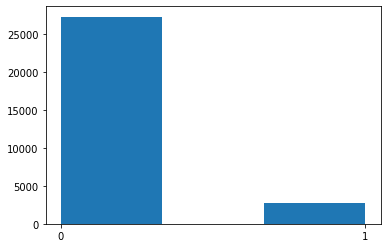

In [34]:
# Now lets look into the churn data
plt.hist(df.churn, bins=3)
plt.xticks([0,1])
plt.show()

**We can see there is a lot of imbalence in the churn dat. We will deal with it in later stage**

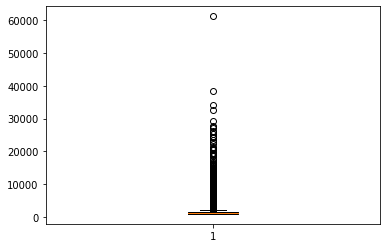

In [35]:
# Lets observe the total amount payed by the customers
plt.boxplot(df.total_av_amt_67)
plt.show()

**Clearly there are a lot of outliers in the data**

In [36]:
# lets finr the percentage of outliers that we can remove
(df[df.total_av_amt_67 > 3500].shape[0]/df.shape[0])*100

3.1873041274921654

**We can remove thse outliers as they are less than 3 percent of the data. It wont effect the entire data**

In [37]:
# Removed the outliers succesfully
df = df[df.total_av_amt_67 < 3500]

In [38]:
df.shape

(29038, 169)

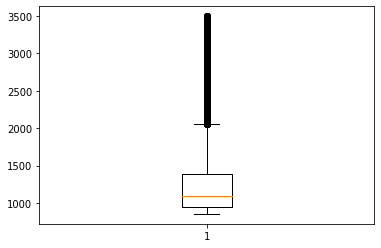

In [39]:
# Now lets check the box plot once again
plt.boxplot(df.total_av_amt_67)
plt.show()

**Now it looks better than before**

## Handling Imbalanced data

In [40]:
# There many ways to handle the imbalenced data
# We will use Oversampling and Smote methods

In [41]:
# Counting the no.of churns and non-churns
count_0, count_1 = df.churn.value_counts()
count_0, count_1

(26389, 2649)

In [42]:
# Creating new dfs from the non-churn and churn customers
df_class_0 = df[df.churn==0]
df_class_1 = df[df.churn==1]
df_class_0.shape,df_class_1.shape

((26389, 169), (2649, 169))

In [43]:
# Testing to create a sample size of churn no.of customers from non-churn data 
df_class_0.sample(count_1).shape

(2649, 169)

**Now everything is ready for performing imbalance handling**

### Oversampling

In [44]:
# Create a new dataframe from churn and non-churn dfs
# In oversampling we need to expand the churn df as we have less data
df_oversample_1 = df_class_1.sample(count_0,replace=True)

In [45]:
# Now the churn df is equal to non churn df. 
# Now lets concat df_oversample with the df_class_0 to build a new df
df_over_fin = pd.concat([df_class_0,df_oversample_1], axis=0)
df_over_fin.shape


(52778, 169)

In [46]:
df_over_fin.churn.value_counts()

1    26389
0    26389
Name: churn, dtype: int64

In [47]:
y=df_over_fin.pop('churn')
X=df_over_fin

In [48]:
y.value_counts()

1    26389
0    26389
Name: churn, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=100, stratify=y)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42222, 168), (10556, 168), (42222,), (10556,))

In [51]:
scalr = StandardScaler()
X_train[list(X_train.columns)] = scalr.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scalr.transform(X_test[list(X_test.columns)])

In [52]:
X_train.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
19667       0.472721        0.0             0.0             0.0   
42607       0.773050        0.0             0.0             0.0   
20928      -1.187376        0.0             0.0             0.0   
71728      -0.272913        0.0             0.0             0.0   
19518       0.078821        0.0             0.0             0.0   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
19667             0.0  0.004455 -0.539624 -0.299085     0.025157     0.550985   
42607             0.0  0.021457 -0.470565 -0.950640    -0.353937    -0.432048   
20928             0.0 -0.016522  0.220212 -0.926980     1.119936     0.680138   
71728             0.0 -0.771442  0.663415 -0.059715    -0.125207     1.289490   
19518             0.0  2.625285  1.038812  0.251655     3.082930     1.525161   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
19667     0.391581     -0.424286     -0.286393      0.024056      -0.204869   
42607    -0.526393      0.877620      0.079610     -0.710548      -0.204869   
20928    -0.522369     -0.558963     -0.507408     -0.712011      -0.204869   
71728     0.734636     -0.398653      0.720088     -0.037120      -0.204869   
19518     1.209279      1.353663      0.085358     -0.036559      -0.204869   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
19667      -0.194162      -0.201816      -0.258514      -0.268843   
42607      -0.194162      -0.193785      -0.258514      -0.261457   
20928      -0.122814      -0.191143      -0.258514       0.148257   
71728      -0.194162      -0.201816      -0.231124      -0.268843   
19518      -0.194162      -0.201816      -0.258514      -0.268843   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
19667      -0.271720          0.041176         -0.253929         -0.272507   
42607      -0.266339         -0.335587         -0.281182         -0.323420   
20928      -0.255487         -0.241936         -0.262501         -0.323420   
71728      -0.271720         -0.305074         -0.301300         -0.317882   
19518      -0.271720         -0.240293         -0.309972         -0.305733   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
19667          0.154555          0.369081          0.736091         -0.125424   
42607         -0.562172         -0.569646         -0.599050         -0.223758   
20928         -0.369584         -0.417144         -0.599050         -0.223758   
71728         -0.615623         -0.609596         -0.599050         -0.223758   
19518         -0.428330         -0.243253         -0.504739         -0.223758   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
19667          -0.23371         -0.259272         -0.203218         -0.197422   
42607          -0.23371         -0.281470         -0.203218         -0.197422   
20928          -0.23371         -0.281470         -0.203218         -0.159285   
71728          -0.23371         -0.281470         -0.203218         -0.197422   
19518          -0.23371         -0.281470         -0.203218         -0.197422   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
19667          -0.24479      0.119376      0.074816      0.302483   
42607          -0.24479     -0.591280     -0.564557     -0.600411   
20928          -0.24479     -0.406628     -0.452015     -0.600411   
71728          -0.24479     -0.608363     -0.603372     -0.597082   
19518          -0.24479     -0.444711     -0.365642     -0.528245   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
19667          0.040424          0.746257          0.613042         -0.466863   
42607         -0.200591         -0.313226         -0.399598          1.306262   
20928          1.354977          0.788233         -0.399598         -0.356133   
71728          0.028990          1.573334    

#### Performing PCA

In [53]:
# Building a PCa model with 90% varience
pca_model = PCA(0.95)
pca_train_df = pca_model.fit_transform(X_train)

In [54]:
log_reg = LogisticRegression()
log_model = log_reg.fit(pca_train_df,y_train)

In [55]:
pca_test_df = pca_model.transform(X_test)

In [56]:
pred_probs_test = log_model.predict_proba(pca_test_df)[:,1]

In [57]:
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.88'

# Performing all the Imbalance handling methods and Comparing the models

In [63]:
X = df.drop('churn',axis=1)
y = df.churn

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,train_size=0.3,stratify=y)

In [65]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)


## Model-1: Logistic Regression

### 1. `Original Unsampled Data`

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from collections import Counter


In [67]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[18473     0]
 [ 1854     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18473
           1       0.00      0.00      0.00      1854

    accuracy                           0.91     20327
   macro avg       0.45      0.50      0.48     20327
weighted avg       0.83      0.91      0.87     20327
 

AUC-ROC
0.5420111663595331


### `2.SMOTE Resampling`

In [69]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 7916, 1: 795})
After Counter({1: 7916, 0: 7916})


In [70]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[18473     0]
 [ 1854     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18473
           1       0.00      0.00      0.00      1854

    accuracy                           0.91     20327
   macro avg       0.45      0.50      0.48     20327
weighted avg       0.83      0.91      0.87     20327
 

AUC-ROC
0.5420110203696219


### `3.ADASYN Resampling`

In [72]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)


Before Counter({0: 7916, 1: 795})
After Counter({0: 7916, 1: 7773})


In [73]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[18473     0]
 [ 1854     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18473
           1       0.00      0.00      0.00      1854

    accuracy                           0.91     20327
   macro avg       0.45      0.50      0.48     20327
weighted avg       0.83      0.91      0.87     20327
 

AUC-ROC
0.54201191090808


### `4.SMOTE + Tomek Resampling`

In [75]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)


Before Counter({0: 7916, 1: 795})
After Counter({1: 7828, 0: 7828})


In [76]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[18473     0]
 [ 1854     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18473
           1       0.00      0.00      0.00      1854

    accuracy                           0.91     20327
   macro avg       0.45      0.50      0.48     20327
weighted avg       0.83      0.91      0.87     20327
 

AUC-ROC
0.5420109911716396


### `5.SMOTE + ENN Resampling`

In [78]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 7916, 1: 795})
After Counter({1: 7158, 0: 4237})


In [79]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

LogisticRegression(C=1e-10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

Confusion Matrix
[[18473     0]
 [ 1854     0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18473
           1       0.00      0.00      0.00      1854

    accuracy                           0.91     20327
   macro avg       0.45      0.50      0.48     20327
weighted avg       0.83      0.91      0.87     20327
 

AUC-ROC
0.5420109765726485


## Model-2: Decision Tree

In [81]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### `1. Original Unsampled Data`

In [82]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.4s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[17789   684]
 [  838  1016]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18473
           1       0.60      0.55      0.57      1854

    accuracy                           0.93     20327
   macro avg       0.78      0.76      0.77     20327
weighted avg       0.92      0.93      0.92     20327
 

AUC-ROC
0.8785072543262797


### `2.SMOTE Resampling`

In [84]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.8s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[16559  1914]
 [  597  1257]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     18473
           1       0.40      0.68      0.50      1854

    accuracy                           0.88     20327
   macro avg       0.68      0.79      0.71     20327
weighted avg       0.91      0.88      0.89     20327
 

AUC-ROC
0.8438780824236849


### `3.ADASYN Resampling`

In [86]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.4s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[17006  1467]
 [  698  1156]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     18473
           1       0.44      0.62      0.52      1854

    accuracy                           0.89     20327
   macro avg       0.70      0.77      0.73     20327
weighted avg       0.91      0.89      0.90     20327
 

AUC-ROC
0.8684804482427515


### `4. SMOTE + Tomek Resampling`

In [88]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.7s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

Confusion Matrix
[[16700  1773]
 [  579  1275]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     18473
           1       0.42      0.69      0.52      1854

    accuracy                           0.88     20327
   macro avg       0.69      0.80      0.73     20327
weighted avg       0.92      0.88      0.90     20327
 

AUC-ROC
0.8649270392060577


### `5.SMOTE + ENN Resampling`

In [90]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.1s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

Confusion Matrix
[[16255  2218]
 [  493  1361]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     18473
           1       0.38      0.73      0.50      1854

    accuracy                           0.87     20327
   macro avg       0.68      0.81      0.71     20327
weighted avg       0.92      0.87      0.88     20327
 

AUC-ROC
0.8677943540562508


## Model-3: Random Forest

### 1. `Original Unsampled Data`

In [92]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[18236   237]
 [ 1028   826]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18473
           1       0.78      0.45      0.57      1854

    accuracy                           0.94     20327
   macro avg       0.86      0.72      0.77     20327
weighted avg       0.93      0.94      0.93     20327
 

AUC-ROC
0.9254981657535583


### `2.SMOTE Resampling`

In [94]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[17686   787]
 [  694  1160]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18473
           1       0.60      0.63      0.61      1854

    accuracy                           0.93     20327
   macro avg       0.78      0.79      0.79     20327
weighted avg       0.93      0.93      0.93     20327
 

AUC-ROC
0.9167820424934585


### `3.ADASYN Resampling`

In [96]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[17598   875]
 [  682  1172]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     18473
           1       0.57      0.63      0.60      1854

    accuracy                           0.92     20327
   macro avg       0.77      0.79      0.78     20327
weighted avg       0.93      0.92      0.93     20327
 

AUC-ROC
0.9140416512720306


### `4. SMOTE + Tomek Resampling`

In [98]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

Confusion Matrix
[[17593   880]
 [  682  1172]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     18473
           1       0.57      0.63      0.60      1854

    accuracy                           0.92     20327
   macro avg       0.77      0.79      0.78     20327
weighted avg       0.93      0.92      0.92     20327
 

AUC-ROC
0.9098139878306315


### `5. SMOTE + ENN Resampling`

In [100]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

Confusion Matrix
[[16916  1557]
 [  466  1388]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     18473
           1       0.47      0.75      0.58      1854

    accuracy                           0.90     20327
   macro avg       0.72      0.83      0.76     20327
weighted avg       0.93      0.90      0.91     20327
 

AUC-ROC
0.9136445003177033


## Model Comparision

In [102]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [103]:
clf_eval_df

model     resample  precision    recall  f1-score   AUC-ROC
0   Logistic Regression       actual   0.000000  0.000000  0.000000  0.542011
1   Logistic Regression        smote   0.000000  0.000000  0.000000  0.542011
2   Logistic Regression       adasyn   0.000000  0.000000  0.000000  0.542012
3   Logistic Regression  smote+tomek   0.000000  0.000000  0.000000  0.542011
4   Logistic Regression    smote+enn   0.000000  0.000000  0.000000  0.542011
5         Decision Tree       actual   0.597647  0.548004  0.571750  0.878507
6         Decision Tree        smote   0.396405  0.677994  0.500299  0.843878
7         Decision Tree       adasyn   0.440717  0.623517  0.516417  0.868480
8         Decision Tree  smote+tomek   0.418307  0.687702  0.520196  0.864927
9         Decision Tree    smote+enn   0.380274  0.734088  0.501012  0.867794
10        Random Forest       actual   0.777046  0.445523  0.566335  0.925498
11        Random Forest        smote   0.595788  0.625674  0.610366  0.916782
12        Random Forest       adasyn   0.572545  0.632147  0.600872  0.914042
13        Random Forest  smote+tomek   0.571150  0.632147  0.600102  0.909814
14        Random Forest    smote+enn   0.471307  0.748652  0.578454  0.913645

**The best model from all of them is the Rnadome forest with no resampling i:e actual data**

## Now lets extract the best features from the random forest we just built

In [104]:
# Lts copy the best estimator atributes and build a model to extract the important features
df_final = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

df_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
final_prob = df_final.predict_proba(X_test)[:,1]
roc_auc_score(y_test,final_prob)

0.9271593265567153

In [106]:
#Building a dataframe with features and their importance
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": df_final.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
91       total_ic_mou_8  0.069363
7                arpu_8  0.056743
61       total_og_mou_8  0.043856
16        roam_ic_mou_8  0.042901
19        roam_og_mou_8  0.035991
109      max_rech_amt_8  0.032290
106    total_rech_amt_8  0.030159
58          og_others_8  0.029701
73         loc_ic_mou_8  0.024445
112  last_day_rch_amt_8  0.024140

**These are the top 10 features that playes major role.**